<a href="https://colab.research.google.com/github/minjeongss/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 불러오기 & 기초 설정

In [1]:
import numpy as np
import pandas as pd

#시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import missingno

#알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

#판다스 경고 제거
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#kaggle에서 바로 작업하는 경우
#test=pd.read_csv('../input/titanic/test.csv')
#train=pd.read_csv('../input/titanic/train.csv')

#코랩에서 작업하는 경우 => 추가적으로 데이터 불러오기가 요구됨
from google.colab import files
uploaded=files.upload()

import io
test=pd.read_csv(io.BytesIO(uploaded['test.csv']))
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))

### 정보 보기

🚨 `()`를 넣는 것:각 행의 값들이 있어야 함
- dtype
- column: 인덱스의 역할을 하는 것

`head`: 상위 위치의 정보 <br>
`tail`: 하위 위치의 정보

In [ ]:
train.head(n=1)
train.tail(n=2)

`describe`


*   `include='all'` 존재 O: NaN 포함 보여줌
*   존재 X: NaN 제외 보여줌

In [ ]:
train.describe()
train.describe(include='all')

`dtypes`: 데이터 타입<br>
`info`: 데이터 타입 + 갯수 + null 유무

In [ ]:
train.dtypes
train.info()

`columns`: 열 제목

In [ ]:
train.columns
train.columns[3],train.columns[3:5]
train[5:20]

`shape`: 행,열 갯수

In [ ]:
train.shape

### data로 합치기
data=train+test

In [ ]:
ntrain=train.shape[0] #train의 행 갯수
ntest=test.shape[0] #test의 행 갯수

y_train=train['Survived'].values
passId=test['PassengerId']

data=pd.concat((train,test))

print("data size is: {}" .format(data.shape))

### 시각화하기

In [ ]:
train['Survived'].value_counts()



*   결측값=흰색
  *    Survived의 밑 부분=test에선 null이기에
*   오른쪽=각 행의 데이터의 완전성






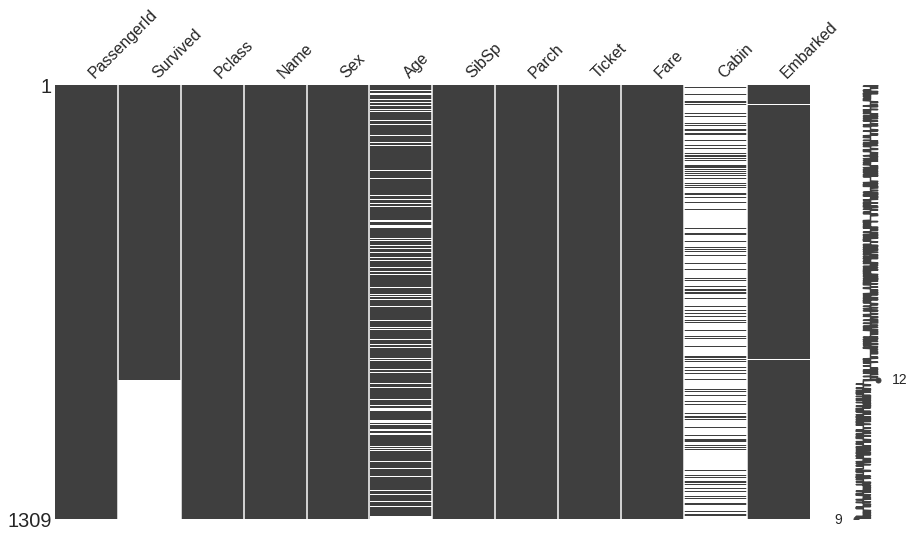

In [10]:
missingno.matrix(data,figsize=(15,8))

NaN값 감지

*   insa()
*   isnull()



In [ ]:
data.isnull().sum()

In [ ]:
data.Age.isnull()
data.Age.isnull().any() #nay=하나라도 있으면 OK

### 상관관계 나타내기

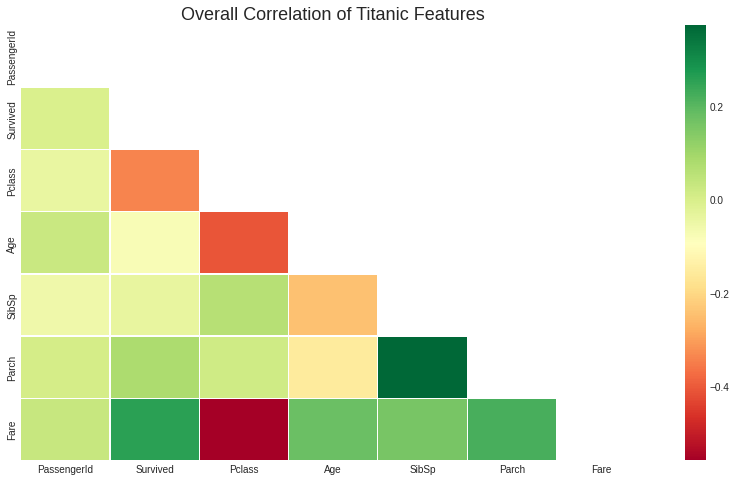

In [16]:
corr=data.corr()

mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(14,8))

plt.title('Overall Correlation of Titanic Features',fontsize=18)

sns.heatmap(corr,mask=mask,annot=False,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
plt.show()

### Survived 분석


*   0: 생존X
*   1: 생존O



0    549
1    342
Name: Survived, dtype: int64


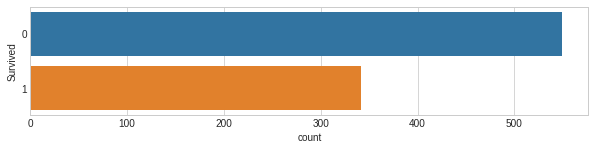

In [19]:
fig=plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data=train) #표 그리기
print(train.Survived.value_counts()) #값 출력

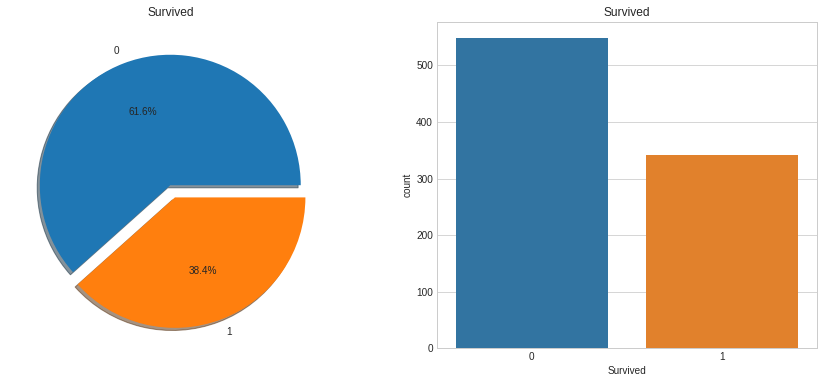

In [33]:
f,ax=plt.subplots(1,2,figsize=(15,6))

#pie 형태
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived') #위쪽에 제목 붙이기
ax[0].set_ylabel('') #왼쪽에 나타나던 Survived 제거

#막대 형태
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

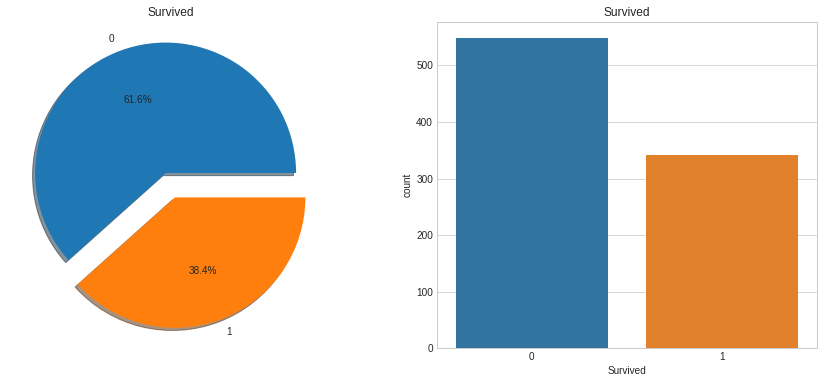

In [34]:
#함수
def piecount(col):
  f,ax=plt.subplots(1,2,figsize=(15,6))
  #파이
  train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())],autopct='%1.1f%%',ax=ax[0],shadow=True)
  ax[0].set_title(col)
  ax[0].set_ylabel('')
  #막대
  sns.countplot(col,data=train,ax=ax[1])
  ax[1].set_title(col)
  plt.show()

piecount('Survived')

### Pclass 분석


*   1=1st
*   2=2nd
*   3=3rd



`groupby`: 그룹화<br>
`groupby([x],[y])[x]`:x를 기준으로

In [ ]:
train.groupby(['Pclass','Survived'])['Survived'].count()

In [36]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


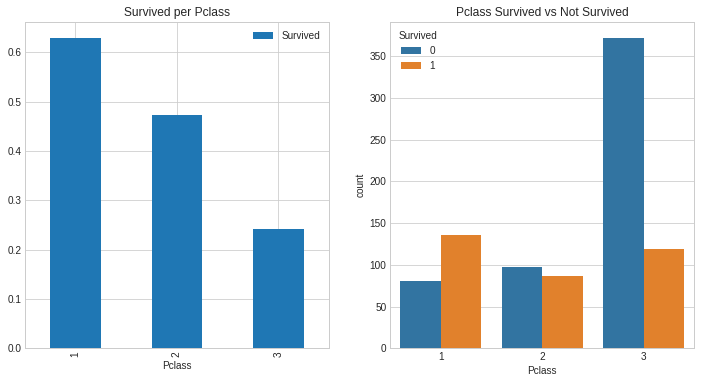

In [37]:
f,ax=plt.subplots(1,2,figsize=(12,6))

#첫 번째/칸 번호 당 생존자 수
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')

#두 번째/칸 번호 당 생존자, 비생존자 수 비교
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

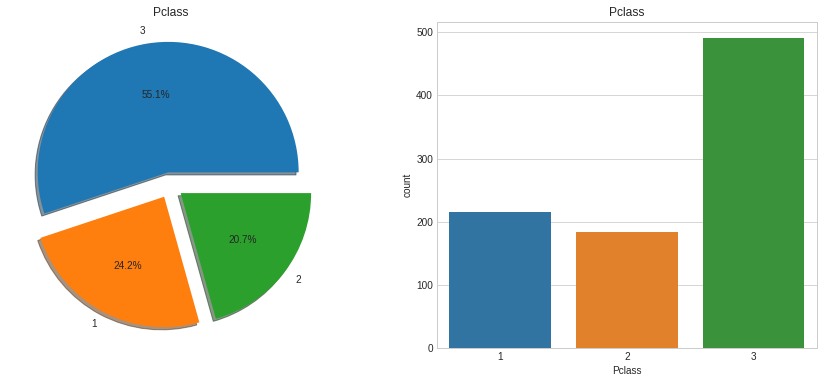

In [38]:
piecount("Pclass")